Khai báo thư viện

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Khởi tạo một ảnh màu đen có kích
thước 500x500x3.

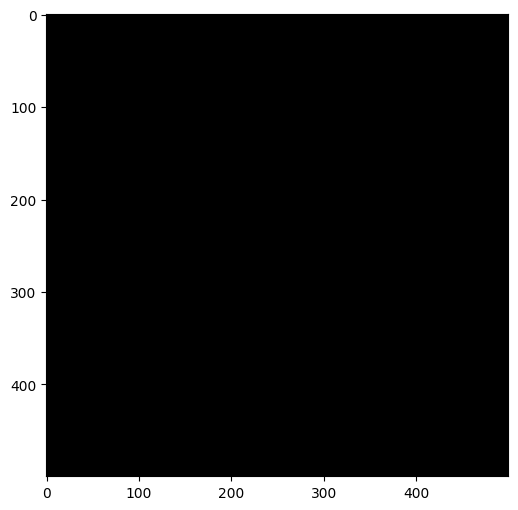

In [ ]:
img = np.zeros([500,500,3])
plt.figure(figsize=(6, 6))
plt.imshow(img)

Vẽ một hình vuông:
Sử dụng hàm cv2.rectangle trong opencv:
Trong đó:
- cp : là ảnh đầu vào.
- (100, 100) , (300, 300) : là tọa độ điểm top-left và bottom-right.
- (255,0,0) : là màu của đường vẽ.
- 2 : là độ dày.

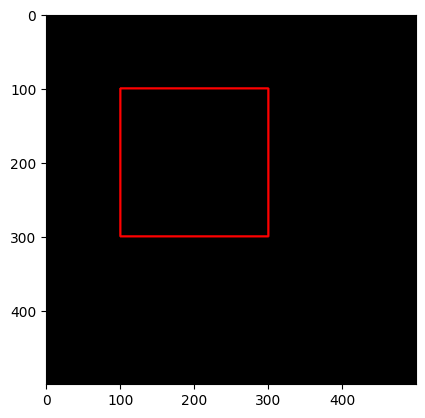

In [ ]:
cp=img.copy()
rectang = cv2.rectangle(cp, (100, 100), (300, 300), (255,0,0), 2)
plt.imshow(rectang)

Vẽ một hình tròn:
Sử dụng hàm cv2.circle trong opencv:
Trong đó:
- cp : là ảnh đầu vào.
- (250, 250): là tọa độ tâm của đường tròn.
- 100 (radius): bán kính.
- (0,0,255) : là màu của đường vẽ.
- 1 : là độ dày.

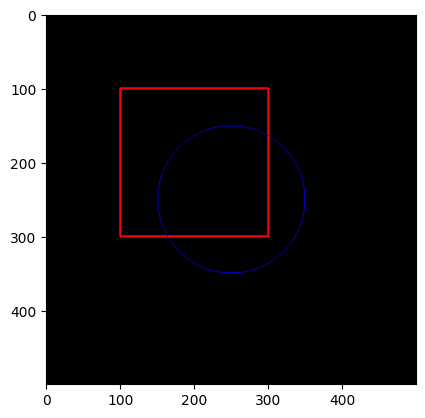

In [ ]:
cir = cv2.circle(cp, (250, 250), 100, (0, 0, 255), 1)
plt.imshow(cir)

Viết chữ:
Sử dụng hàm cv2.puttext trong opencv:
Trong đó:
- cp: là ảnh đầu vào.
- ‘Vision’: là input text.
- (100, 100): tọa độ viết chữ.
- font: font style.
- 2: font size.
- (255, 0, 0): là màu của chữ.
- 5: là độ dày chữ
- cv2.LINE_AA: là LineType

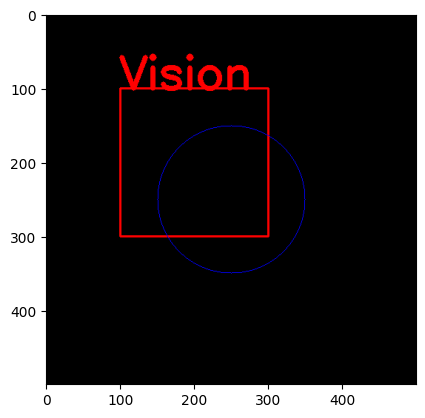

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
new_img = cv2.putText(cp, 'Vision', (100, 100), font, 2, (255,0,0),5, cv2.LINE_AA)
plt.imshow(new_img)

Vẽ đường thẳng:
Sử dụng hàm cv2.line trong opencv:
Trong đó:
- cp: là ảnh đầu vào.
- (400, 100): tọa độ điểm xuất phát.
- (400, 400): tọa độ điểm kết thúc.
- (255, 255, 255): là màu của line.
- 3: là độ dày.

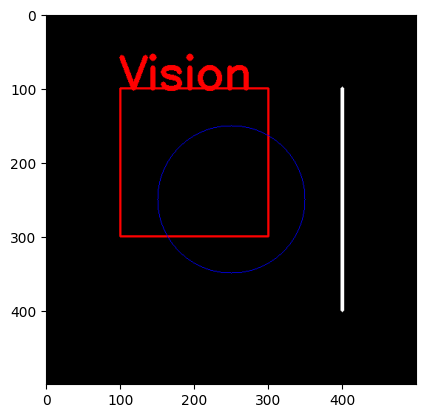

In [ ]:
line = cv2.line (cp, (400, 100), (400, 400), (255, 255, 255), 3)
plt.imshow(line)

Vẽ đa giác:
Sử dụng hàm cv2.polyline trong opencv:
Trong đó:
- cp: là ảnh đầu vào.
- pts là tập tọa độ các đỉnh của đa giác.
- True: là True khi đa giác kín.
- (255, 255, 255): là màu của line.
- 2: là độ dày.

[[[100 350]]

 [[300 400]]

 [[350 450]]

 [[300 480]]

 [[150 450]]

 [[100 350]]]


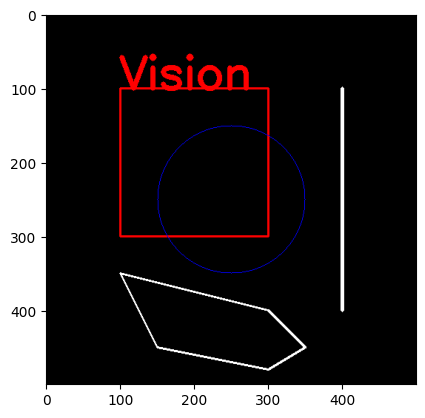

In [ ]:
pts = np.array([[100, 350], [300, 400],
                [350, 450], [300, 480],
                [150, 450], [100, 350]],
                np.int32)
pts = pts.reshape((-1, 1, 2))
print (pts)
a = cv2.polylines(cp,[pts],
                      True, (125, 125, 125), 2)
plt.imshow(a)

Lấy địa chỉ ảnh, resize 2 ảnh sao cho kích thước bằng nhau, chỉnh màu hiển thị ảnh

In [ ]:
img1 = cv2.imread('/content/car.png')
img2 = cv2.imread('/content/watermark_no_copy.png')
img1 = cv2.resize(img1, (800, 400))
img2_resized = cv2.resize(img2, (800,400))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_resized = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2RGB)

Cộng ảnh với tỷ lệ hiển thị của 2 bức ảnh

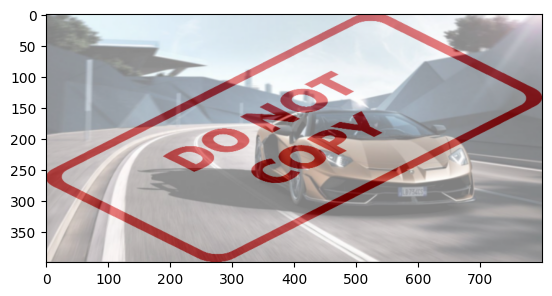

In [ ]:
dst = cv2.addWeighted(img1, 0.5, img2_resized, 0.5, 0.0)
plt.imshow(dst)

Resize nhỏ lại ảnh watermark

In [ ]:
small_img = cv2.resize(img2_resized, (200,100))

Copy ảnh cần watermark làm ảnh thử sau đó dán ảnh watermark đã thu nhỏ vào

In [ ]:
img3 = img1.copy()

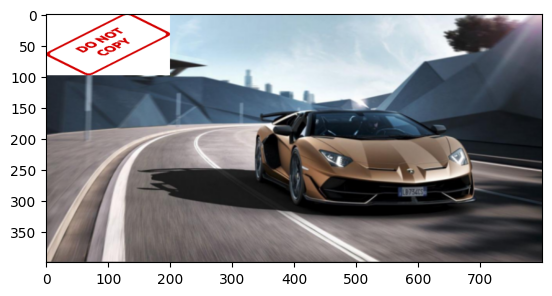

In [ ]:
img3[0:small_img.shape[0], 0:small_img.shape[1]] = small_img
plt.imshow(img3)

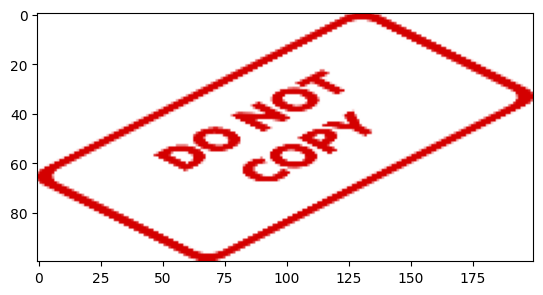

In [ ]:
plt.imshow(small_img)

Định nghĩa 4 điểm toạ độ cần watermark

In [ ]:
y1 = 240
y2 = 340
x1 = 500
x2 = 700

Đính 4 toạ độ thành vùng ảnh cần có watermark vào biến `roi`

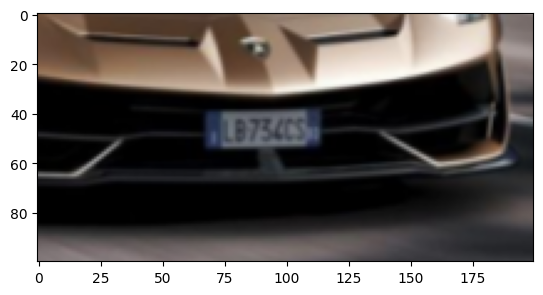

In [ ]:
roi = img1[y1:y2,x1:x2]
plt.imshow(roi)

Biến đổi ảnh watermark thành ảnh gray

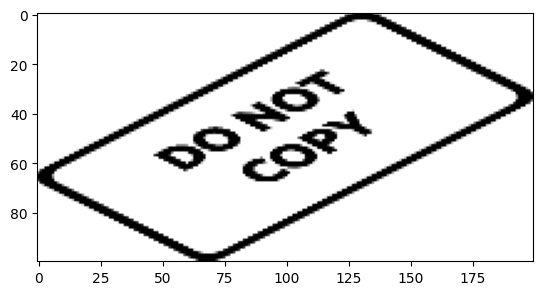

In [ ]:
small_img_gray = cv2.cvtColor(small_img, cv2.COLOR_RGB2GRAY)
plt.imshow(small_img_gray, cmap='gray')
plt.show()

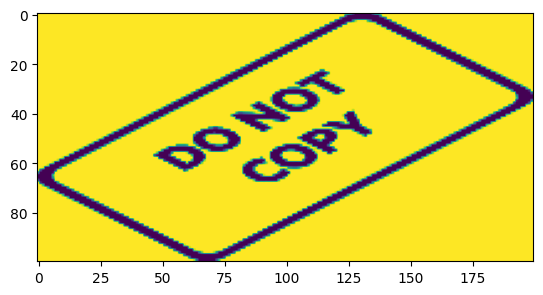

In [ ]:
plt.imshow(small_img_gray)

Threshold ảnh watermark xám vào biến mặt nạ mask

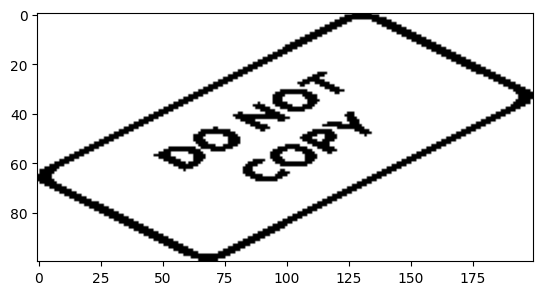

In [ ]:
ret,mask = cv2.threshold(small_img_gray,127,255,cv2.THRESH_BINARY)
plt.imshow(mask, cmap='gray')

Thu được ảnh background từ phép biến đổi bitwise_or của 2 ảnh nhị phân `roi` dựa trên mặt nạ biến `mask`

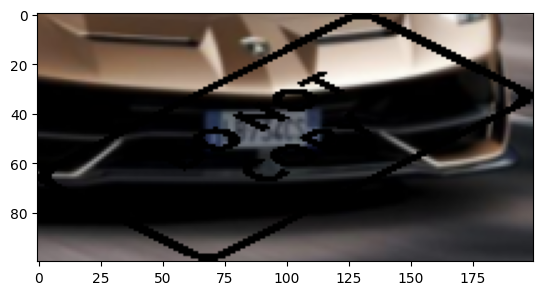

In [ ]:
background = cv2.bitwise_or(roi, roi, mask = mask)
plt.imshow(background)

Sử dụng hàm bitwise_not đảo ngược gam màu watermark vào biến mặt nạ mask_inv

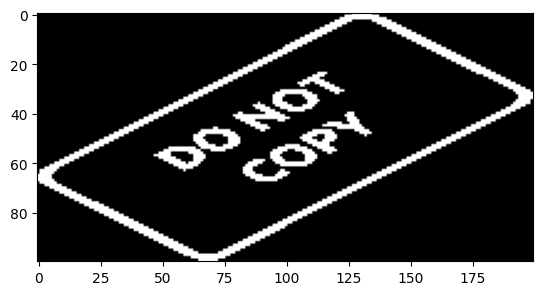

In [ ]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv, cmap = 'gray')

Thu được ảnh background từ phép biến đổi bitwise_and của 2 ảnh nhị phân `small_img` dựa trên mặt nạ biến `mask_inv`

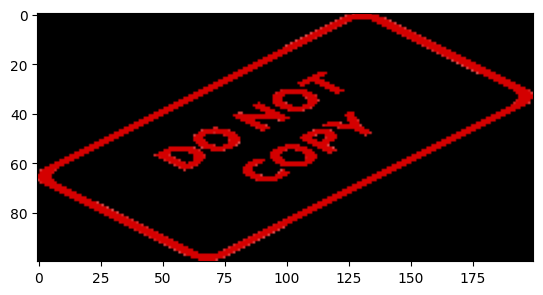

In [ ]:
foreground = cv2.bitwise_and(small_img, small_img, mask = mask_inv)
plt.imshow(foreground)

Trộn 2 ảnh foreground và background

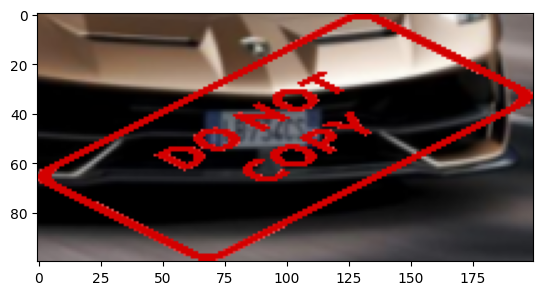

In [ ]:
final_roi = cv2.add(foreground,background)
plt.imshow(final_roi)

Hoàn thiện ảnh gốc đã watermark

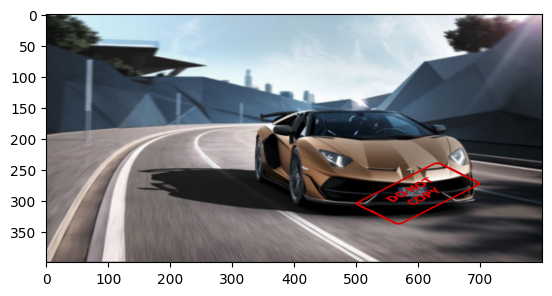

In [ ]:
img1[240:240+final_roi.shape[0], 500:500+final_roi.shape[1]] = final_roi
plt.imshow(img1)

Log Transformations, Power - Law (Gamma) Transformations - Cường độ màu ảnh

In [ ]:
# Mở ảnh.
img = cv2.imread('/content/car.png')

# Chuyển đổi ảnh từ không gian màu BGR sang RGB.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Áp dụng biến đổi log.
c = 255/(np.log(1 + np.max(img)))
log_transformed = c * np.log(1 + img)

# Chỉ định kiểu dữ liệu cho biến log_transformed.
log_transformed = np.array(log_transformed, dtype=np.uint8)

<ipython-input-254-d95ac89fb25a>:5: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + img)


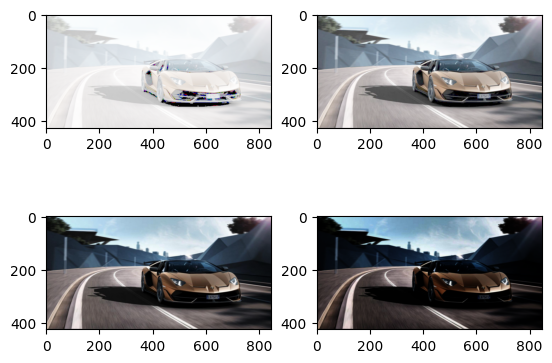

In [ ]:
# Khởi tạo biến i để sử dụng trong vòng lặp.
i = 1

# Duyệt qua các giá trị gamma trong danh sách.
for gamma in [0.1, 0.5, 1.2, 2.2]:

  # Áp dụng sự sửa đổi gamma cho ảnh.
  gamma_corrected = np.array(255 * (img / 255) ** gamma, dtype=np.uint8)

  # Vẽ ảnh kết quả trong bốn ô con của biểu đồ 2x2.
  plt.subplot(2, 2, i)
  plt.imshow(gamma_corrected)
  i += 1

Piecewise - Linear Transformation
(Contrast), Equalize Histogram - Độ tương phản ảnh đen trắng

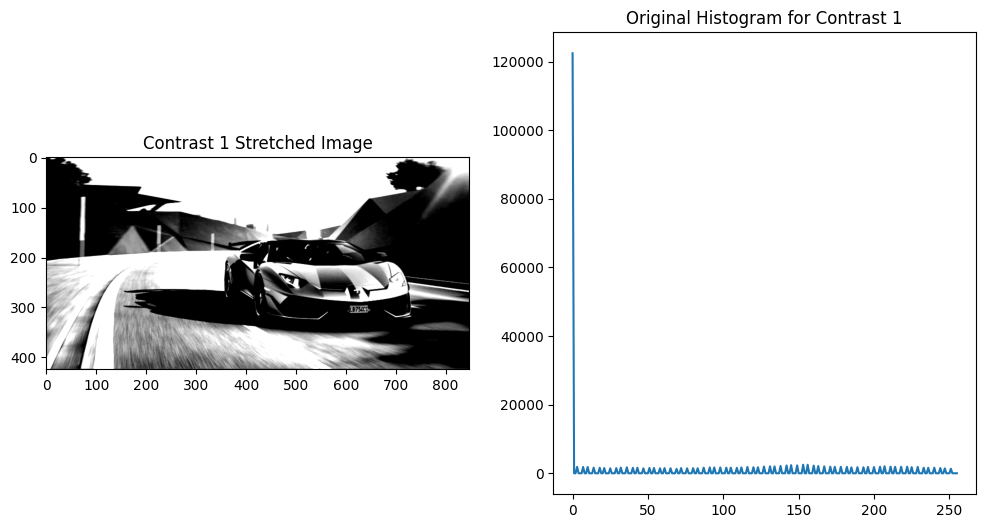

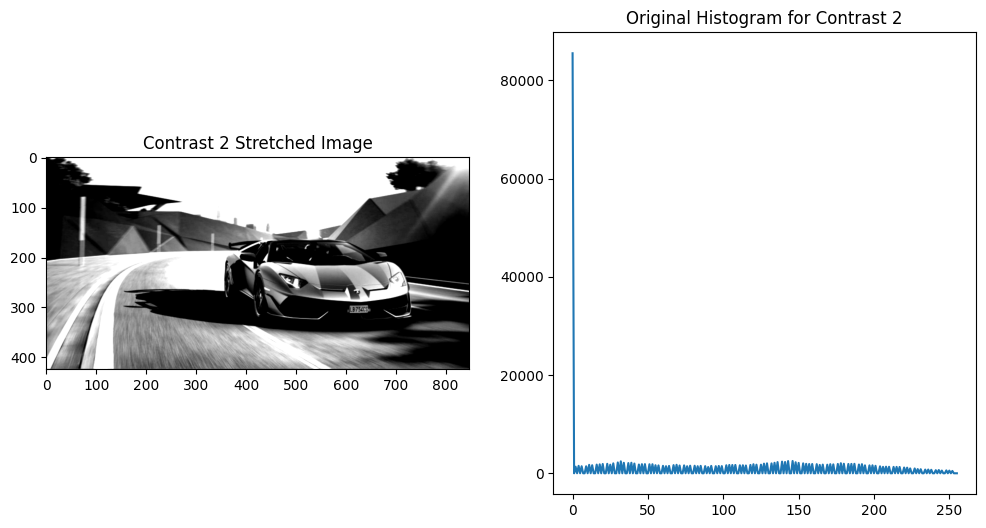

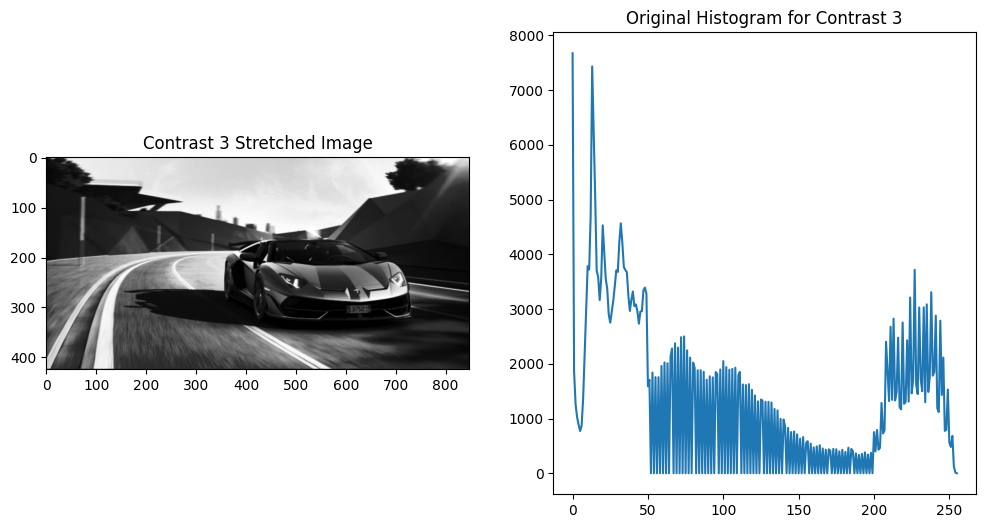

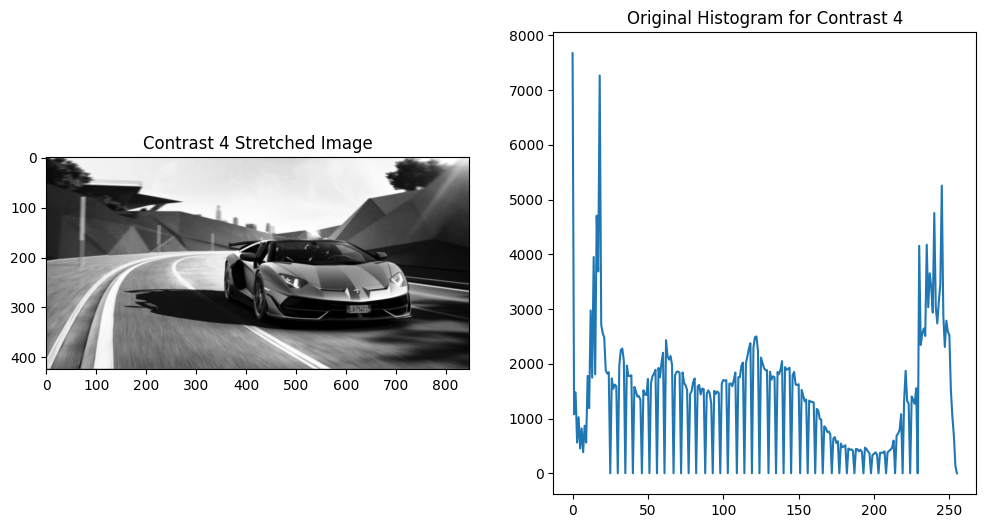

In [ ]:
# Đọc hình ảnh và chuyển đổi thành ảnh xám
img = cv2.imread('/content/car.png')  # Đọc hình ảnh từ đường dẫn '/content/car.png'
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Chuyển đổi hình ảnh sang dạng ảnh xám
"""
Hàm biến đổi pixel
Hàm pixelVal có bốn tham số đầu vào và một giá trị trả về, theo thứ tự:

1. pix: Đây là giá trị pixel đầu vào để biến đổi độ tương phản của nó.

2. r1: Đây là ngưỡng dưới của khoảng pixel để áp dụng biến đổi tuyến tính. Các giá trị pixel nhỏ hơn hoặc bằng r1 sẽ được biến đổi dựa trên s1.

3. s1: Đây là giá trị đầu ra tương ứng với các giá trị pixel nhỏ hơn hoặc bằng r1 sau khi áp dụng biến đổi. Nó là giá trị đầu ra cho các pixel trong khoảng [0, r1].

4. r2: Đây là ngưỡng trên của khoảng pixel để áp dụng biến đổi tuyến tính. Các giá trị pixel nằm trong khoảng (r1, r2] sẽ được biến đổi dựa trên công thức tuyến tính.

5. s2: Đây là giá trị đầu ra tương ứng với các giá trị pixel trong khoảng (r1, r2] sau khi áp dụng biến đổi. Nó là giá trị đầu ra cho các pixel trong khoảng (s1, s2].

Hàm pixelVal sẽ biến đổi giá trị pix dựa trên các ngưỡng và giá trị đầu ra đã cho để tạo ra một biến đổi độ tương phản tuyến tính.
"""
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1) * pix  # Biến đổi pixel dựa trên công thức tuyến tính cho pix trong khoảng [0, r1]
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1  # Biến đổi pixel dựa trên công thức tuyến tính cho pix trong khoảng (r1, r2]
    else:
        return ((255 - s2) / (255 - r2)) * (pix - r2) + s2  # Biến đổi pixel dựa trên công thức tuyến tính cho pix trong khoảng (r2, 255]

# Define parameters for four different contrasts
contrast_params = [
    (70, 0, 140, 255),  # Tham số cho độ tương phản 1
    (50, 0, 160, 255),  # Tham số cho độ tương phản 2
    (100, 50, 180, 200),  # Tham số cho độ tương phản 3
    (30, 20, 200, 230)  # Tham số cho độ tương phản 4
]

# Create and display the contrast-stretched images
for i, params in enumerate(contrast_params):
    r1, s1, r2, s2 = params
    pixelVal_vec = np.vectorize(pixelVal)
    contrast_stretched = pixelVal_vec(gray, r1, s1, r2, s2).astype(np.uint8)  # Tạo và hiển thị ảnh sau khi đã tăng độ tương phản

    # Calculate histogram for the current contrast-stretched image
    hist = cv2.calcHist([contrast_stretched], channels=[0], histSize=[256], ranges=(0, 255), mask=None)  # Tính histogram cho ảnh đã tăng độ tương phản

    plt.figure(figsize=(12, 6))

    # Plot the contrast-stretched image
    plt.subplot(1, 2, 1)
    plt.imshow(contrast_stretched, cmap='gray')  # Hiển thị ảnh sau khi đã tăng độ tương phản
    plt.title(f'Contrast {i+1} Stretched Image')  # Đặt tiêu đề cho ảnh đã tăng độ tương phản

    # Plot the original histogram
    plt.subplot(1, 2, 2)
    plt.plot(hist)  # Vẽ biểu đồ histogram ban đầu
    plt.title(f'Original Histogram for Contrast {i+1}')  # Đặt tiêu đề cho biểu đồ histogram ban đầu

    plt.show()  # Hiển thị các biểu đồ và ảnh đã tăng độ tương phản
